

# Project: Investigate TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> This data set contains information about 10,865 movies collected from The Movie Database (TMDb), including user ratings and revenue. Dataset is being collected from kaggle.com. The primary goal of the project is to go through the dataset and the general data analysis process using numpy, pandas and matplotlib.


## Questions to be answered. (Click on the link to scroll to the answer directly.)

<ol>
    <li> <a href="#high_movie"> Which year has the highest number of Movie releases.</a></li>
    <li> <a href="#highlow_profit"> Which Movie Has The Highest Or Lowest Profit? </a></li>
    <li> <a href="#high_profit_10"> Top 10 movies which earned highest profit? </a></li>    
    <li> <a href="#highlow_revenue"> Which Movie Has The Highest Or Lowest Revenue?</a> </li>
    <li> <a href="#top10_revenue"> Which are the Top 10 movies by Revenue?</a> </li>
    <li> <a href="#highlow_budget">  Which Movie Has The Highest Or Lowest Budget? </a> </li>
    <li> <a href="#top10_budget"> Which are the Top 10 movies by Budget.</a> </li>
    <li> <a href="#bottom10_budget"> Which are the Bottom 10 movies by budget.</a> </li>
    <li> <a href="#highlow_runtime">Movie with shorest and longest runtime?</a> </li>
    <li> <a href="#popularity_runtime">Which length movies most liked by the audiences according to their popularity?</a> </li>
    <li> <a href="#avg_runtime">What is the Average Runtime Of Movies From Year To Year?</a> </li>
    <li> <a href="#budgetvsrevenue">  How does budget affects the revenue? </a></li>
    <li> <a href="#monthrelease"> Which Month Released Highest Number Of Movies In All Of The Years?</a> </li>
    <li> <a href="#countgenre"> Which Genre Has The Highest Release Of Movies?</a> </li>
    <li> <a href="#actors">Who are the most frequent actors?</a> </li>
    <li> <a href="#companyvsrelease">Top 20 Production Companies With Higher Number Of Release?</a> </li>
    <li> <a href="#corr">Discuss correlation?</a> </li>
    
   
</ol>







In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.2f}'.format


<a id='wrangling'></a>
## Data Wrangling

> **Cleaning**: In this section of I intend to clean the data i.e. remove the unnecessary columns fixing column names , filling missing values etc.

### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv')   
pd.set_option('display.max_columns', None)  # to display all columns for a better view of the data



<b> Get first 5 rows of the dataset<b>

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


<b> Get last 5 rows of the dataset </b>

In [10]:
df.tail()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10861,21,0.08,nan,nan,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95.00,Documentary,Bruce Brown Films,2066-06-15,11,7.40,1966
10862,20379,0.07,nan,nan,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176.00,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.70,1966
10863,39768,0.07,nan,nan,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94.00,Mystery|Comedy,Mosfilm,2066-01-01,11,6.50,1966
10864,21449,0.06,nan,nan,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80.00,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.40,1966
10865,22293,0.04,19000.00,nan,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,fire|gun|drive|sacrifice|flashlight,74.00,Horror,Norm-Iris,2066-11-15,15,1.50,1966


### From the initial impressions of the data some observations can be made.

<ul>
    <li> There are many unnecessary columns like imdb_id, homepage, tagline, overview , revenue_adj , budjet_adj. These columns to be removed.  </li>
    <li> Currency is not given for the budget and revenue. I will assume USD for analysis.  </li>
    <li> There are many rows which contains 0 in the budget and revenue column. </li>
    <li> Various columns contain NULL values. </li>
<ul>


## Data Cleaning

>   <b>Things to be taken care of. </b>
 <ol>
    <li> There are many unnecessary columns like imdb_id, homepage, tagline, overview. These columns to be removed.  </li>
    <li> Changing format of release date into datetime format.  </li>
    <li> Various columns contain NULL values. </li>
    <li> Remove duplicate rows. </li>
<ol>




<b>1. Remove unnecessary columns.</b>

In [5]:
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'],axis =1,inplace = True)
print("Afetr Removing Unnecessary Columns (Rows,Columns) : ",df.shape)



Afetr Removing Unnecessary Columns (Rows,Columns) :  (10866, 15)


<b>2. Changing format of release date to datetime</b>

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

<b>3.Dealing with 0 and NULL values. </b>

<b>Important : I removed the columns having 0 in budget in revenue but after that i analyzed that due to >40% of the rows containing 0 so analysis will not be proper so I imported dataset again and worked on new data. <b>

In [7]:

# Source : https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

# Checking for an zero values in the budget and revenue columns
print("Rows With Zero Values In The Budget Column:",df[(df['budget']==0)].shape[0])
print("Rows With Zero Values In The Revenue Column:",df[(df['revenue']==0)].shape[0])



Rows With Zero Values In The Budget Column: 5696
Rows With Zero Values In The Revenue Column: 6016


<b>4. Removing duplicate values </b>

In [8]:
sum(df.duplicated())

# remove duplicates
df.drop_duplicates(inplace = True)
print("Afetr Removing Duplicate Values (Rows,Columns) : ",df.shape)

Afetr Removing Duplicate Values (Rows,Columns) :  (10865, 15)


In [9]:
df.replace(0, np.nan , inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> Now data is cleaned and ready for analysis. 

## Defining functions functions to be called later.

### I created all the functions here so that while looking at the figures anyone need not to look for the code for a better observation

In [30]:
#calculate Profit for each of the movie and add a new column in the dataframe named 'Profit'
df['Profit'] = df['revenue'] - df['budget']

# this function sets the attribue of the graph so we dont have to write the same code again and again
def set_data(ax,title , x,y):
    plt.title(title,fontsize=13)
    plt.set_xlabel(x,fontsize=12)
    plt.set_ylabel(y,fontsize=12)
    #set the figure size
    sns.set(rc={'figure.figsize':(6,4)})
    sns.set_style("whitegrid")
 

   # this function finds mimimum and maximum of any given column     
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = df[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = df[x].idxmax()
    high = pd.DataFrame(df.loc[high_index,:])
    low = pd.DataFrame(df.loc[min_index,:])
    #print the movie with high and low profit
    print("Movie Which Has Highest "+ x + " : ",df['original_title'][high_index])
    print("Movie Which Has Lowest "+ x + "  : ",df['original_title'][min_index])
    return pd.concat([high,low],axis = 1)


# this function returns 10 largest values from a particular column
# this function also takes x as argument then finds 10 highest values and plots a graph.
def top_10(x):
    top_10 = df.nlargest(10, x)
    print(top_10[[ x , 'original_title']])
    data = list(map(str,(top_10['original_title'])))
    x_axis = list(data[:10])
    y_axis = list(top_10[x][:10])
    ax = sns.pointplot(x=y_axis,y=x_axis)
    #setup the figure size
    sns.set(rc={'figure.figsize':(10,5)})
    #setup the title and labels of the plot.
    ax.set_title("Top 10 Movies by "+ x + ":" ,fontsize = 15)
    ax.set_xlabel(x,fontsize = 13) 
    sns.set_style("darkgrid")
    
    
    
# this function returns 10 largest values from a particular column
# this function also takes x as argument then finds 10 highest values and plots a graph.
def small_10(x):
    small_10 = df.nsmallest(10, x)
    print(small_10[[ x , 'original_title']])
    data = list(map(str,(small_10['original_title'])))
    x_axis = list(data[:10])
    y_axis = list(small_10[x][:10])
    ax = sns.pointplot(x=y_axis,y=x_axis)
    #setup the figure size
    sns.set(rc={'figure.figsize':(10,5)})
    #setup the title and labels of the plot.
    ax.set_title("Bottom 10 Movies by "+ x + ":" ,fontsize = 15)
    ax.set_xlabel(x,fontsize = 13) 
    sns.set_style("darkgrid")
    sns.set_style("whitegrid")
    
# this function compartes two columnns and plots the graph of it    
def compare_two_y(x,y):
    df.groupby(x)[y].mean().plot(figsize = (13,5),xticks=np.arange(0,1000,100))
    #setup the title of the figure
    plt.title(x + " Vs " + y,fontsize = 14)
    #setup the x-label and y-label of the plot.
    plt.xlabel(x,fontsize = 13)
    plt.ylabel( "Average " +  y,fontsize = 13)
    #setup the figure size.
    sns.set(rc={'figure.figsize':(10,5)})
    sns.set_style("whitegrid")
 
  # this function compartes two columnns and plots the graph of it    

def compare_two_x(x,y):
    df.groupby(x).mean()[y].plot(figsize = (13,5))
    #setup the figure size.
    sns.set(rc={'figure.figsize':(10,5)})
    #setup the title of the figure
    plt.title("Runtime Vs Year",fontsize = 14)
    #setup the x-label and y-label of the plot.
    plt.xlabel('Year',fontsize = 13)
    plt.ylabel('Runtime',fontsize = 13)
    sns.set_style("whitegrid")
    
    
# this function plots reg i simplified the code in just 2 lines    
def reg_plot(x,y):
    ax = sns.regplot(x=df[x], y=df[y],color='c')
    set_data(ax,x,y)

    # this function finds correlation between two objects
def corr(x,y):
    data_corr = df.corr()
    print("Correlation Between " + x + " And "   + y,data_corr.loc[x,y])
    
def Month_Release():
    #extract the month number from the release date.
    month_release = df['release_date'].dt.month
    #count the movies in each month using value_counts().
    number_of_release = month_release.value_counts().sort_index()
    months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    number_of_release = pd.DataFrame(number_of_release)
    number_of_release['month'] = months
    #change the column name of the new dataframe 'number_of_release'
    number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)
    #plot the bar graph using plot.
    number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
    set_data_mat(plt,'Month','Number Of Movie Release')
    
def count_split_data(x):
    #concatenate all the rows of the genrs.
    data_plot = df[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

def count_genre():
    #call the function for counting the movies of each genre.
    genre = count_split_data('genres')
    #plot a 'barh' plot using plot function for 'genre vs number of movies'.
    genre.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')
    #setup the title and the labels of the plot.
    plt.title("Genre With Highest Release",fontsize=15)
    plt.xlabel('Number Of Movies',fontsize=13)
    plt.ylabel("Genres",fontsize= 13)
    sns.set_style("whitegrid")
    
def genre_pie():
    genre = count_split_data('genres')
    i = 0
    genre_count = []
    for g in genre.index:
             genre_count.append([g, genre[i]])
             i = i+1
    plt.rc('font', weight='bold')
    f, ax = plt.subplots(figsize=(5, 5))
    genre_count.sort(key = lambda x:x[1], reverse = True)
    labels, sizes = zip(*genre_count)
    labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
    ax.pie(sizes, labels=labels_selected,
    autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
    shadow=False, startangle=0)
    ax.axis('equal')
    plt.tight_layout()
    
def company_release():
    #call the 'count_split_data' function which we made earlier for spiliing and counting genres.
    #it wiil count number of movies released by each production company.
    production_companies = count_split_data('production_companies')
    #plot he barh plot.
    production_companies.iloc[:20].plot(kind='barh',figsize=(16,8),fontsize=13)
    plt.title("Production Companies Vs Number Of Movies",fontsize=15)
    plt.xlabel('Number Of Movies',fontsize=14)
    sns.set_style("whitegrid")
    
def frequent_actor():
    #call the 'count_genre' function which we made earlier for spiliing and counting genres.
    #it wiil count number of movies done by each actor.
    count_actor_flims = count_split_data('cast')
    #plot the barh plot.
    count_actor_flims.iloc[:20].plot.bar(figsize=(13,6),colormap= 'tab20c',fontsize=12)
    #setup the title and the labels of the plot.
    plt.title("Most Frequent Actor",fontsize=15)
    plt.xticks(rotation = 70)
    plt.xlabel('Actor',fontsize=13)
    plt.ylabel("Number Of Movies",fontsize= 13)
    sns.set_style("whitegrid")
 

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
    _ = sns.heatmap(corr,cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 })

    
    
    

<a id='high_movie'></a>
## Research Question 1 (Which year has the highest number of Movie releases.)


### (IMPORTANT) I first analyzed this graph after dropping the rows that contained 0 in budget and revenue column. I was getting roughly 350 movies for a given year which was not appropriate to study further so I imported the dataset again without deleting column contained 0 and now I got perfect result.

Text(0,0.5,'Number Of Movies')

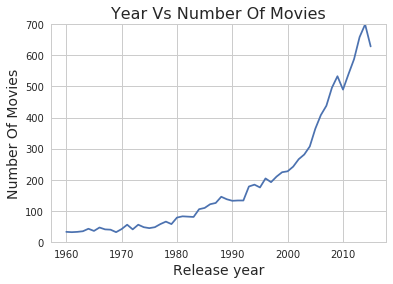

In [28]:
# calculate max for setting upper bound of the graph
max_movies=df.groupby('release_year').count()['id'].max()
df.groupby('release_year').count()['id'].plot(ylim=(0,max_movies))

#set the figure size and labels
sns.set(rc={'figure.figsize':(8,5)})
plt.title("Year Vs Number Of Movies",fontsize = 16)
plt.xlabel('Release year',fontsize = 14)
plt.ylabel('Number Of Movies',fontsize = 14)

After Seeing the plot and we can easily determine that year 2014 year has the highest release of movies (700) followed by year 2013 (659) and year 2015 (629).

<a id='highlow_profit'></a>
## Research Question 2 (Which Movie Has The Highest Or Lowest Profit?)

In [15]:
find_minmax('Profit')

Movie Which Has Highest Profit :  Avatar
Movie Which Has Lowest Profit  :  The Warrior's Way


,1386,2244
id,19995,46528
popularity,9.43,0.25
budget,237000000.00,425000000.00
revenue,2781505847.00,11087569.00
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162.00,100.00
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


> The second column shows the highest profit made by a movie and third column shows the highest in loss movie in this dataset.

> As we can see that 'Avatar' movie Directed by James Cameron earn the highest profit in all, making over 2.5B in profit in this dataset. The movie which is most loss movie in this dataset is The Warrior's Way. Going in loss by more than 400M was directed by Singmoo Lee.

<a id='high_profit_10'></a>
## Research Question 3 (Top 10 movies which earned highest profit?)

            Profit                                original_title
1386 2544505847.00                                        Avatar
3    1868178225.00                  Star Wars: The Force Awakens
5231 1645034188.00                                       Titanic
0    1363528810.00                                Jurassic World
4    1316249360.00                                     Furious 7
4361 1299557910.00                                  The Avengers
3374 1202817822.00  Harry Potter and the Deathly Hallows: Part 2
14   1125035767.00                       Avengers: Age of Ultron
5422 1124219009.00                                        Frozen
8094 1084279658.00                                       The Net


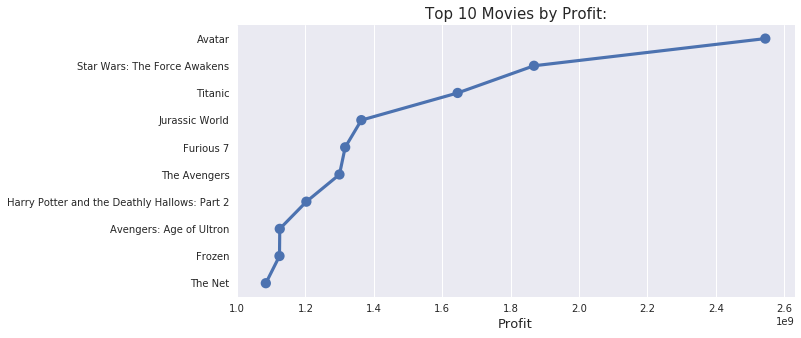

In [28]:
top_10('Profit')

> We can clearly see that the highest probit is made my Avatar and "The net" is in 10th position.

<a id='highlow_revenue'></a>
## Research Question 4 (Which Movie Has The Highest Or Lowest Revenue?)

In [26]:
find_minmax('revenue')

Movie Which Has Highest revenue :  Avatar
Movie Which Has Lowest revenue  :  Shattered Glass


,1386,5067
id,19995,13537
popularity,9.43,0.46
budget,237000000.00,6000000.00
revenue,2781505847.00,2.00
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162.00,94.00
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History


> Again highest revenue is gained by Avatar and lowest is of Shattered Glass.

<a id='top10_revenue'></a>
## Research Question 5 (Top 10 movies by revenue.)

           revenue                                original_title
1386 2781505847.00                                        Avatar
3    2068178225.00                  Star Wars: The Force Awakens
5231 1845034188.00                                       Titanic
4361 1519557910.00                                  The Avengers
0    1513528810.00                                Jurassic World
4    1506249360.00                                     Furious 7
14   1405035767.00                       Avengers: Age of Ultron
3374 1327817822.00  Harry Potter and the Deathly Hallows: Part 2
5422 1274219009.00                                        Frozen
5425 1215439994.00                                    Iron Man 3


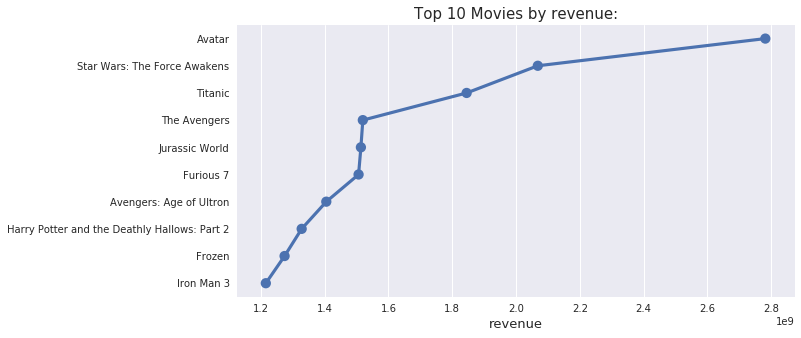

In [29]:
top_10('revenue')

<a id='highlow_budget'></a>
## Research Question 6 (Which Movie Has The Highest Or Lowest Budget?)

In [32]:
find_minmax('budget')

Movie Which Has Highest budget :  The Warrior's Way
Movie Which Has Lowest budget  :  Fear Clinic


,2244,1151
id,46528,287524
popularity,0.25,0.18
budget,425000000.00,1.00
revenue,11087569.00,NaN
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100.00,95.00
genres,Adventure|Fantasy|Action|Western|Thriller,Horror


> The movie with highest budget is The Warriors way and the lowest is of Fear Clinic which is 1 dollars. I dont know how.

<a id='top10_budget'></a>
## Research Question 7 (Top 10 movies by Budget?)

           budget                               original_title
2244 425000000.00                            The Warrior's Way
3375 380000000.00  Pirates of the Caribbean: On Stranger Tides
7387 300000000.00     Pirates of the Caribbean: At World's End
14   280000000.00                      Avengers: Age of Ultron
6570 270000000.00                             Superman Returns
1929 260000000.00                                      Tangled
4411 260000000.00                                  John Carter
7394 258000000.00                                 Spider-Man 3
5508 255000000.00                              The Lone Ranger
634  250000000.00    The Hobbit: The Battle of the Five Armies


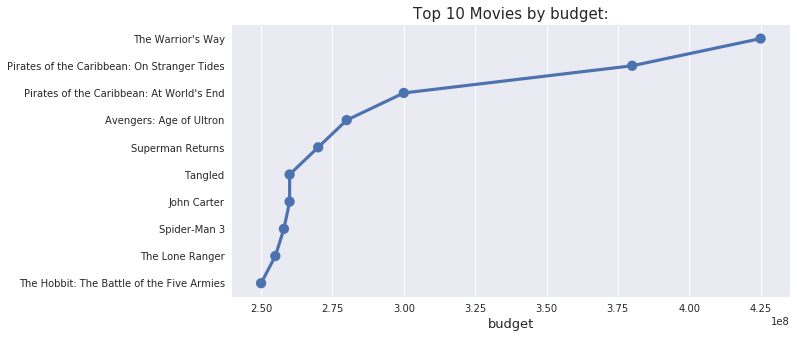

In [33]:
top_10('budget')

<a id='bottom10_budget'></a>
## Research Question 8 (Bottom 10 movies by budget.)

       budget                      original_title
1151     1.00                         Fear Clinic
2618     1.00                        Lost & Found
3065     1.00  Angus, Thongs and Perfect Snogging
3581     1.00             Love, Wedding, Marriage
8944     2.00                        Death Wish 2
2398     3.00                                 Boy
3765     3.00                Death of a Superhero
10050    3.00  Tales from the Darkside: The Movie
1313     5.00         Des Lendemains Qui Chantent
8235     6.00                 Tales from the Hood


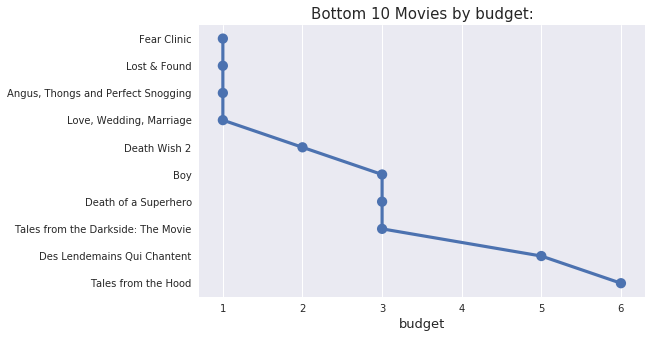

In [27]:
small_10('budget')

### The upper analysis has some serious results. The dataset says that the budget of the movie 'Fear Clinic' is 1.00 but when I searched online I got 11 lakhs USD.
### This dataset has some serious mistakes about the revenue and budget.


<a id='highlow_runtime'></a>
## Research Question 9 (Movie with shorest and longest runtime?)

In [34]:
find_minmax('runtime')

Movie Which Has Highest runtime :  The Story of Film: An Odyssey
Movie Which Has Lowest runtime  :  Fresh Guacamole


,3894,4883
id,125336,142563
popularity,0.01,0.08
budget,NaN,NaN
revenue,NaN,NaN
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900.00,2.00
genres,Documentary,Animation


<a id='popularity_runtime'></a>
## Research Question 10 (Which length movies most liked by the audiences according to their popularity?)

Correlation Between runtime And popularity 0.139032574809


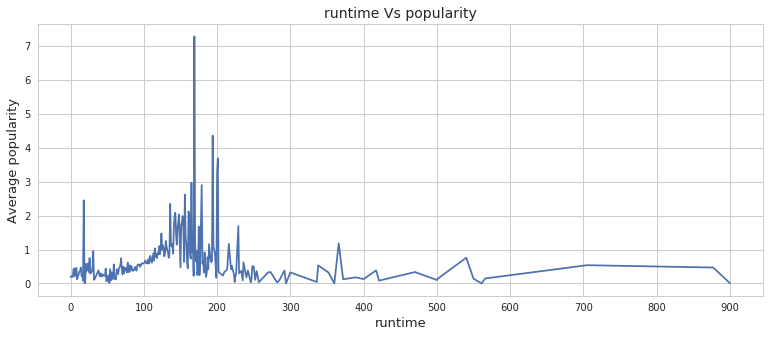

In [36]:
compare_two_y('runtime','popularity')
corr('runtime' , 'popularity')


### We can clearly see that movies with 150 to 200 minute of runtime has the highest popularity.

<a id='avg_runtime'></a>
## Research Question 11 (What is the Average Runtime Of Movies From Year To Year?)

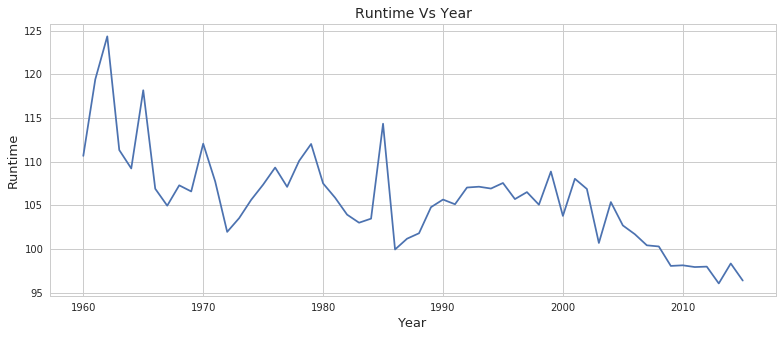

In [9]:
compare_two_x('release_year','runtime')


<a id='budgetvsrevenue'></a>
## Research Question 12 (How does budget affects the revenue?)

Correlation Between revenue And budget 0.734900681908


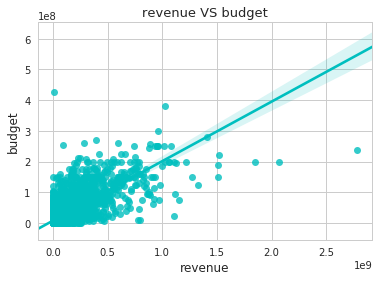

In [35]:
reg_plot('revenue','budget')
corr('revenue' , 'budget')

## Some more Correlations

In [28]:
corr( 'Profit' , 'budget')
corr('release_year' , 'vote_average')
corr('popularity' , 'Profit')

Correlation Between Profit And budget 0.526817653992
Correlation Between release_year And vote_average -0.117575586095
Correlation Between popularity And Profit 0.596201367492


<ul>
    <li>Budget vs Revenue : Budget and revenue both have positive correlation(0.68). There is a good possibility that movies with higher investments result in better revenues. </li>
   <li> Profit Vs Budget : Profit And Budget both have positive correlation(0.53). There is a good possibility that movies with higher investments result in better Profit. It generally happnes too movies with great budget ends up with great profit.   </li>
    <li> Release Year Vs Vote Average : Release year and vote Average have negative correlation(-0.11). Movie ratings(vote average) does not depends on the release year. </li> 
    <li> Popularity Vs Profit : Popularity and profit have positive correlation(0.61). Movie with high popularity tends to earn high profit. </li>
</ul>    


<a id='monthrelease'></a>
## Research Question 13 (Which Month Released Highest Number Of Movies In All Of The Years?)


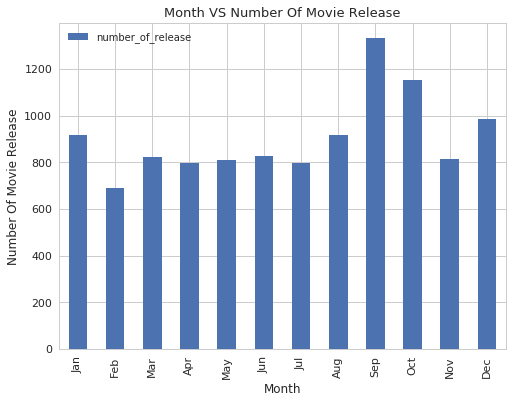

In [52]:
Month_Release()

> We can clearly see that the Month September has highest number of Movie releases. Feb has lowest.

<a id='high_genre'></a>
## Research Question 14 (Which Genre Has The Highest Release Of Movies?)




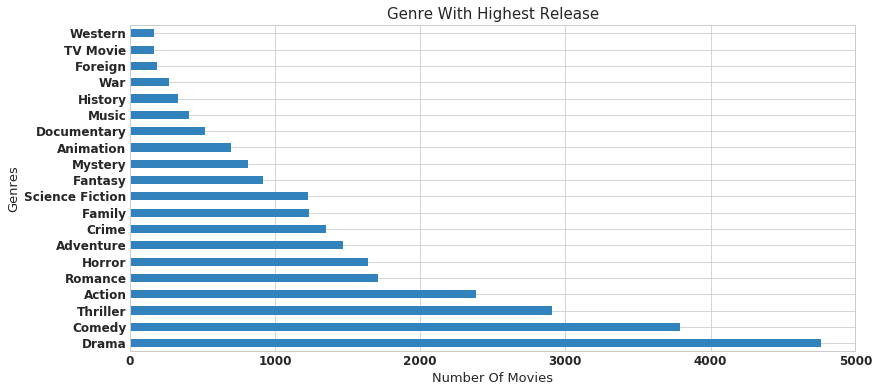

In [48]:
count_genre()

> Prople like drama the most followed by Comedy and Thriller. Crime has very low score.

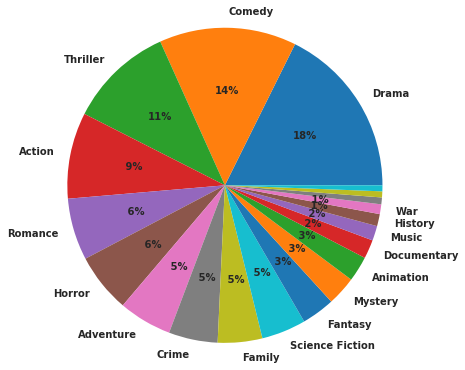

In [54]:
genre_pie()

<a id='actors'></a>
## Research Question 15 (Who are the most frequent actors?)

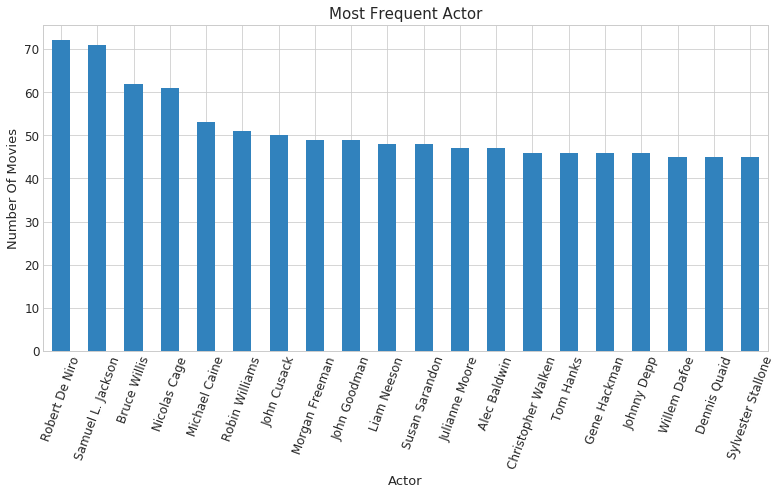

In [24]:
frequent_actor()

> Robert De Niro has the highest number of movies in this career.

<a id='companyvsrelease'></a>
## Research Question 16 (Top 20 Production Companies With Higher Number Of Release?)


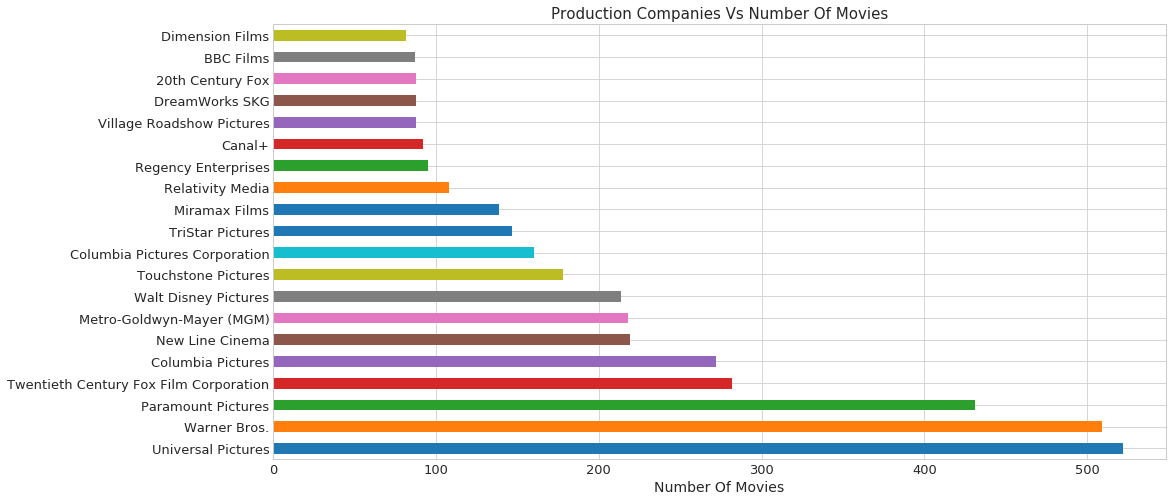

In [22]:
company_release()

> Universal Pictures is the king of production releasing over 550+ movies. Followed by Warner bros and Paramount Pictures.

<a id='corr'></a>
## Research Question 17 (Diccuss Correlation?)

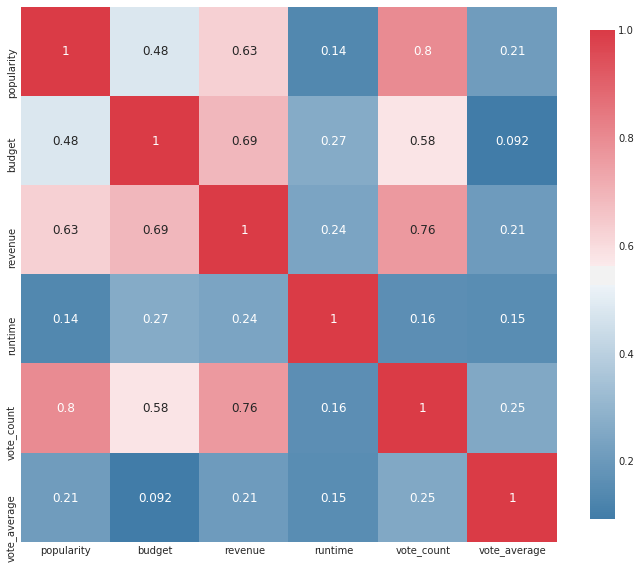

In [32]:
plot_correlation_map(df[['popularity','budget','revenue','runtime','vote_count','vote_average']])

## A brief description of the above plot,

### Plot 1: Budget vs Revenue

> With the of Correlation of 0.68 the revenues do increase slightly at higher levels but the number of movies with high budgets seem scarce. There is a good possibility that movies with higher investments result in better revenues.


### Plot 2: Popularity vs Revenue

>With the Correlation of 0.62 the revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high. It happnes generally movies with higher profits gain more money.


### Plot 3: Vote Average vs Revenue

>The correlation between revenue and vote average is 0.2069. So vote average is not very much related to the revenue. There are possibly more fake reviews than the actual Revenue.

### Plot 4: Runtime vs Revenue

> The correlation between revenue and runtime is 0.2378. So runtime is very much related to the revenue. This is because people are more busy now a days they prefer shorter movies. 

<a id='conclusions'></a>
## Conclusions

   <ul>
       <li> Avatar', 'Star Wars' and 'Titanic' are the most profitable movies. Avatar being on the top.</li>
        <li> Medium duration movies are more popular than long duration movies.</li>
        <li> Average runtime of the movies are decreasing year by year. This is because people now have less time and they want             entertainment for a shorter period of time.</li>
        <li> Drama, Comedy, Thriller and Action are four genres with higest movies released. </li>
        <li> May,June, November and December are most popular month for releasing movies. </li>
        <li>Revenue is directly connected to the budget. It is highly correlated as well </li>
        <li>Warner Bros, Universal Pictures and Paramount Pictures production companies earn more profit than other production companies. They release more movies too as they are big production brands. </li>
       <li>Movies with higher budgets have shown a corresponding increase in the revenues.</li>
       <li>Movie with highest runtime has 900 minutes of content which is very high. </li>
    <li>Defining functions on the upper side made the observation look simpler and learning the facts easy.</li>
   <ul/>    

## Limitations

<ul>
   <li> The biggest limitation I found is the data of budget and revenue. Some movies has only 1 dollars of budget. I mean how does that even possible </li> 
    
    
 </ul>   

In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0